### Telecommunication Customer Churn Prediction using Machine Learning

This project focuses on predicting customer churn for a telecom company using machine learning techniques. By analyzing customer attributes like tenure, service plans, and payment methods, the model aims to identify patterns that indicate the likelihood of churn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv(r"/content/churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Converting object dtype to numerical dtype

In [5]:
df["TotalCharges"] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking missing values

Text(0.5, 1.0, 'Missing Values per Feature')

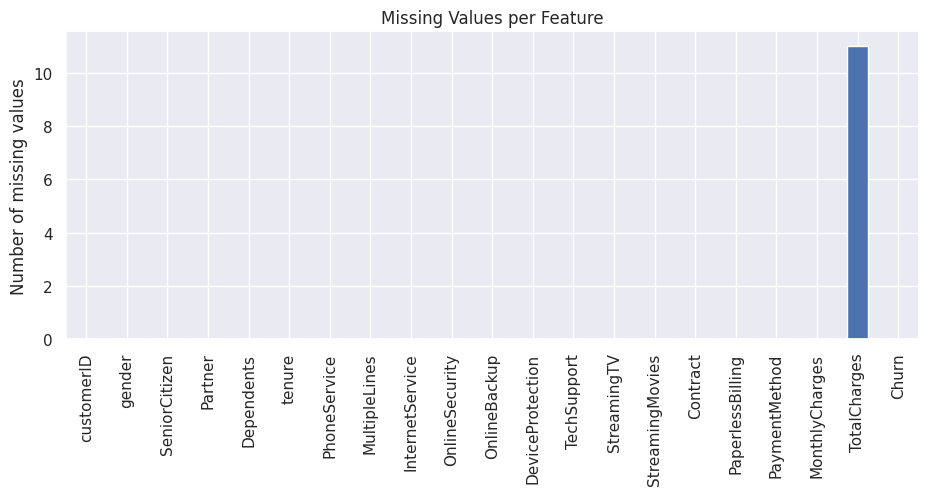

In [7]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')

In [8]:
df[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df["TotalCharges"].fillna(df["TotalCharges"].median()).iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

488     1397.475
753     1397.475
936     1397.475
1082    1397.475
1340    1397.475
3331    1397.475
3826    1397.475
4380    1397.475
5218    1397.475
6670    1397.475
6754    1397.475
Name: TotalCharges, dtype: float64

In [10]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)
df["TotalCharges"].isnull().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Detecting an outliers
1. By boxplot
2. Z-score method
3. Scatter plot
4. IQR(Inter Quartile Range)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df[["tenure", "MonthlyCharges",	"TotalCharges"]].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


<Axes: xlabel='TotalCharges'>

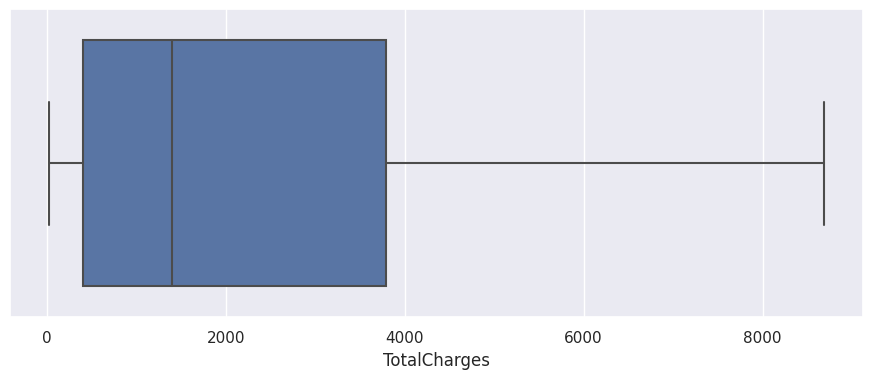

In [14]:
sns.boxplot(x = df["TotalCharges"])

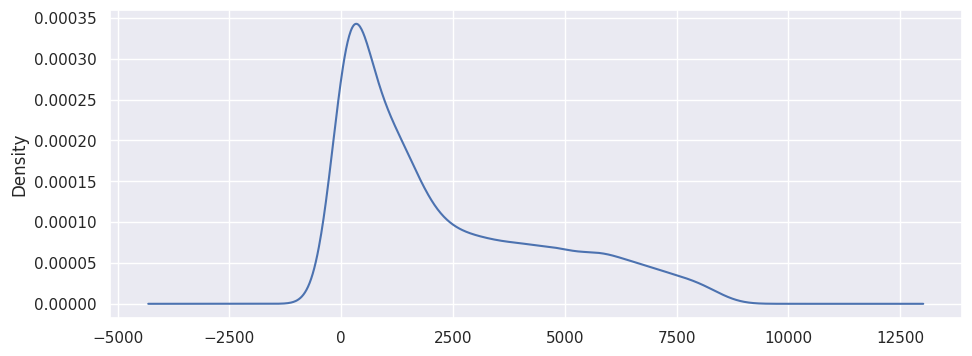

In [15]:
df['TotalCharges'].plot(kind='kde')
plt.show()

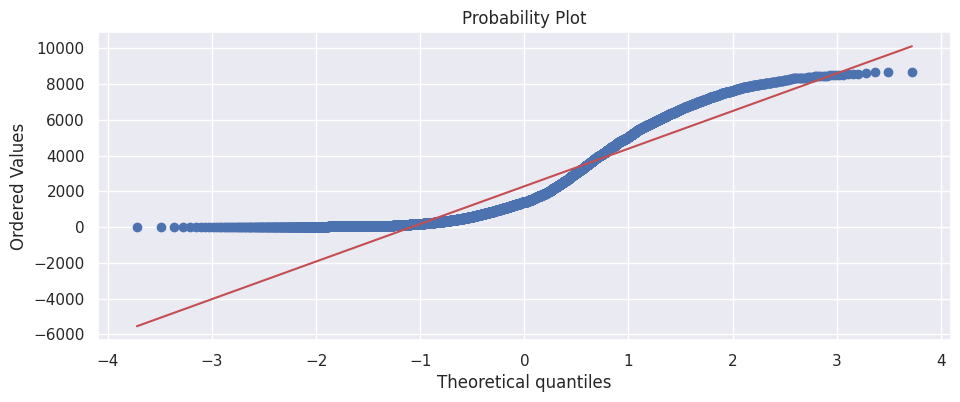

In [16]:
stats.probplot(df['TotalCharges'],dist='norm',plot=plt)
plt.show()

<Axes: xlabel='MonthlyCharges'>

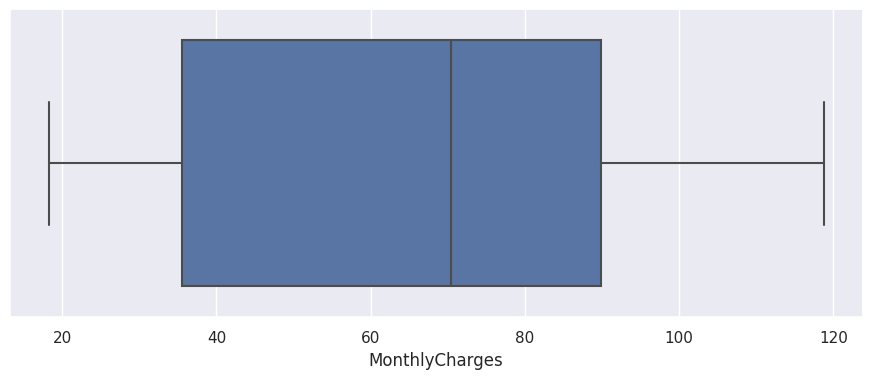

In [17]:
sns.boxplot(x = df["MonthlyCharges"])

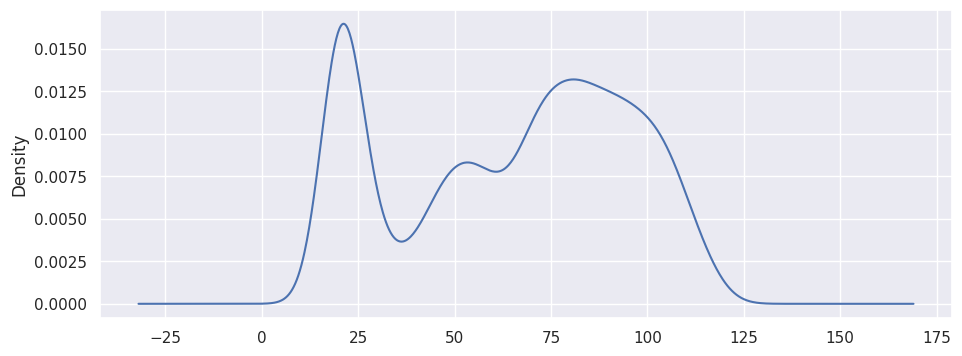

In [18]:
df['MonthlyCharges'].plot(kind='kde')
plt.show()

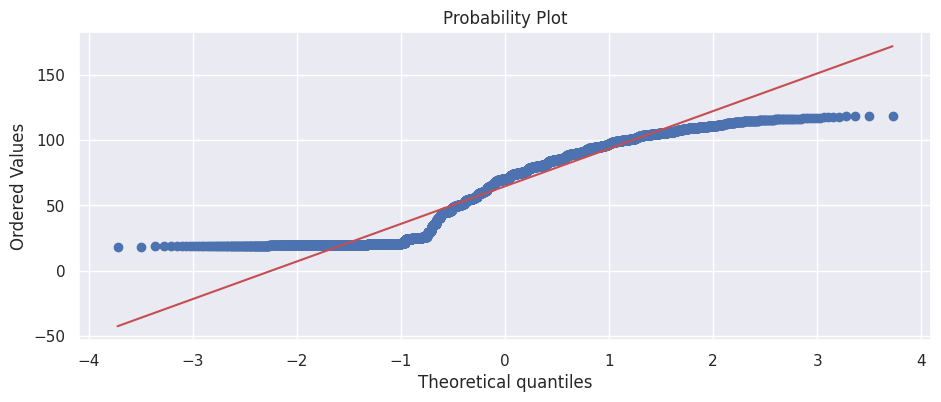

In [19]:
stats.probplot(df['MonthlyCharges'],dist='norm',plot=plt)
plt.show()

<Axes: xlabel='tenure'>

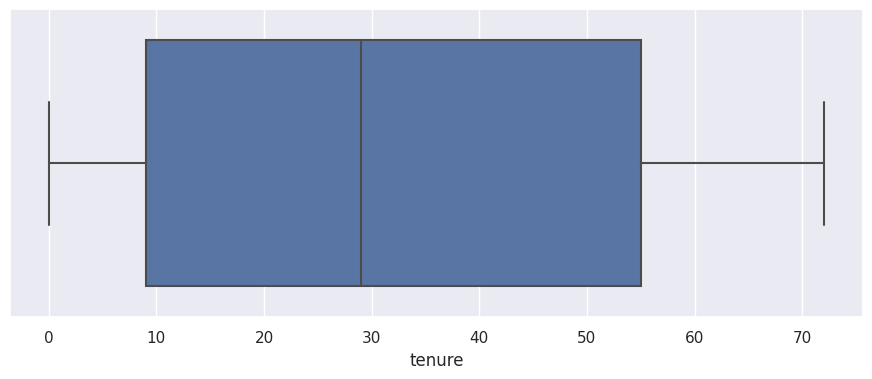

In [20]:
sns.boxplot(x = df["tenure"])

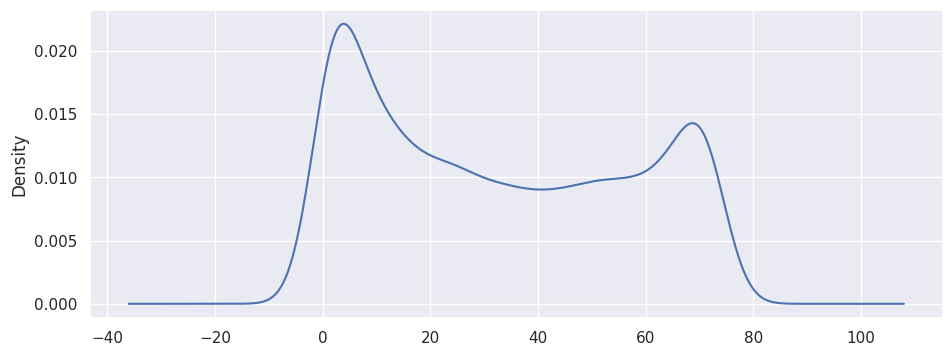

In [21]:
df['tenure'].plot(kind='kde')
plt.show()

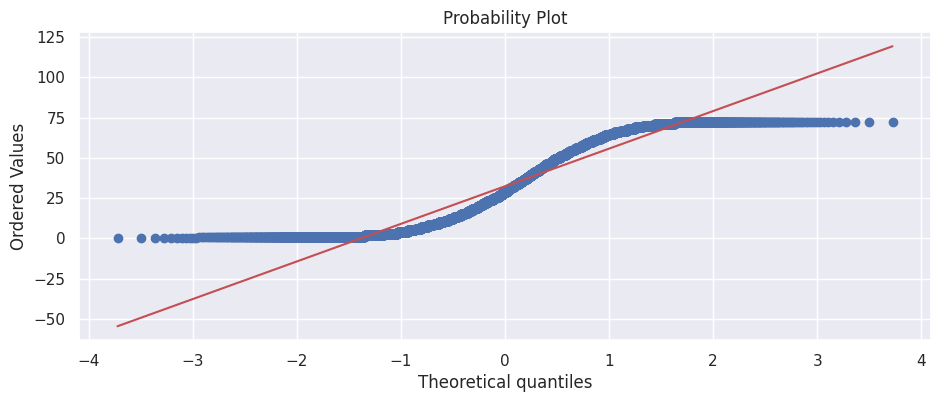

In [22]:
stats.probplot(df['tenure'],dist='norm',plot=plt)
plt.show()

**from above the QQ-plot the tenure is not distributed normally**

# Univariant Analysis


In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='TotalCharges', ylabel='Count'>

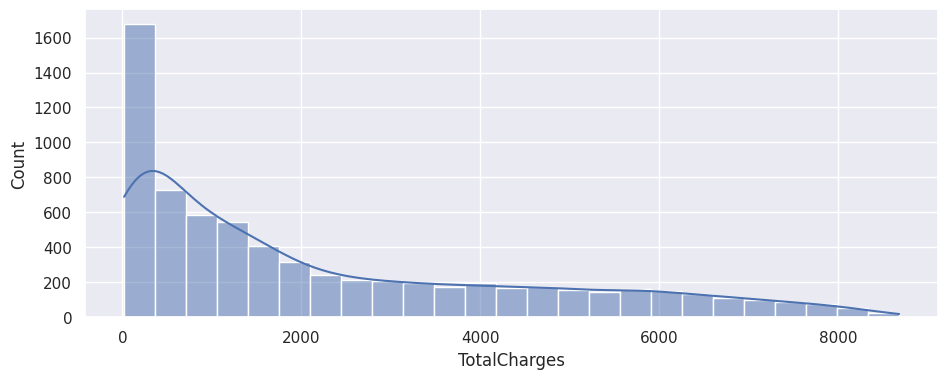

In [25]:
sns.histplot(x = df["TotalCharges"], kde = True)

**above plot is look like a right-skewness**

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

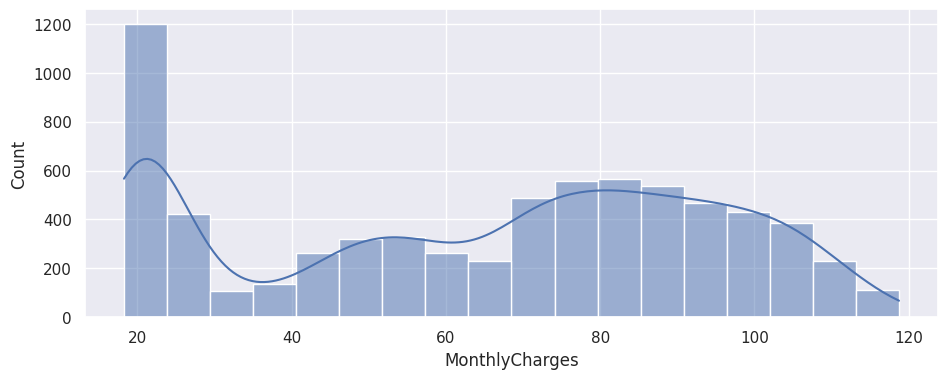

In [26]:
sns.histplot(df["MonthlyCharges"], kde = True)

<Axes: xlabel='Churn', ylabel='count'>

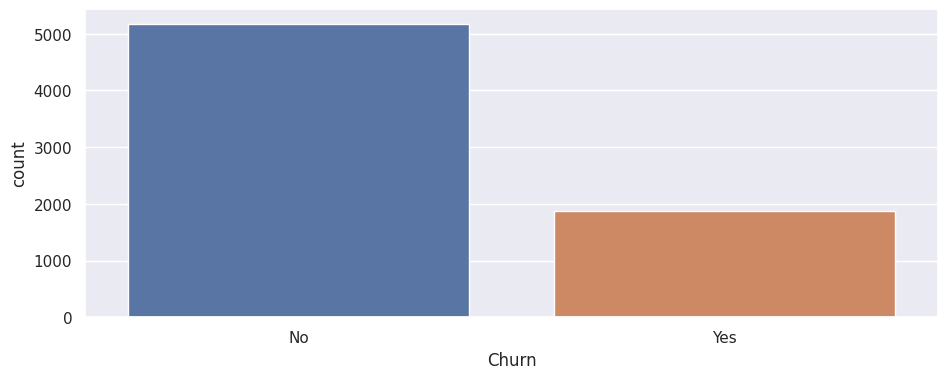

In [27]:
sns.countplot(x = df["Churn"])

**according to my data, most of the customer's are not like to churn,and they want continue with their services**

<Axes: xlabel='PaymentMethod', ylabel='count'>

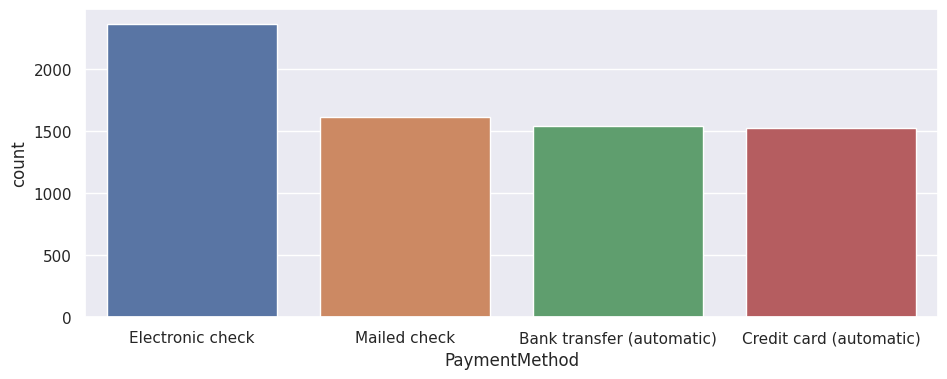

In [28]:
sns.countplot(x = df["PaymentMethod"])

**Majority of the customers are paying bills by Electronic check**

<Axes: xlabel='PaperlessBilling', ylabel='count'>

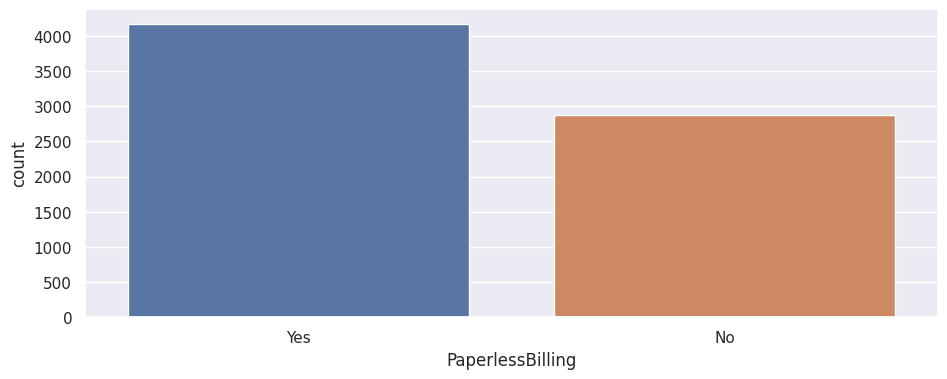

In [29]:
sns.countplot(x = df["PaperlessBilling"])

<Axes: xlabel='Contract', ylabel='count'>

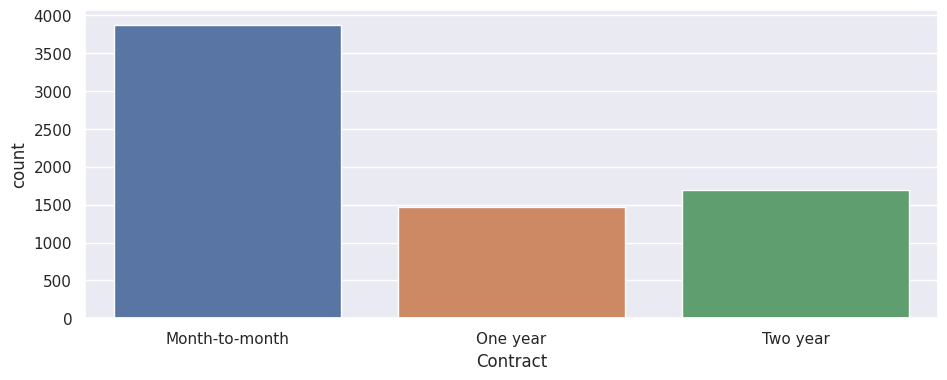

In [30]:
sns.countplot(x = df["Contract"])


**Majority of the customer's are likely to pay bills month to month contract**

<Axes: xlabel='InternetService', ylabel='count'>

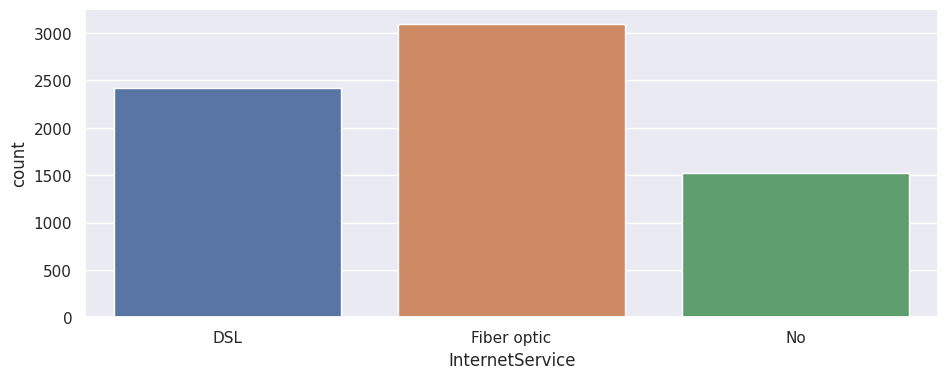

In [31]:
sns.countplot(x = df["InternetService"])

**Mostly customers are using fiber optic internetservice only**

<Axes: xlabel='gender', ylabel='count'>

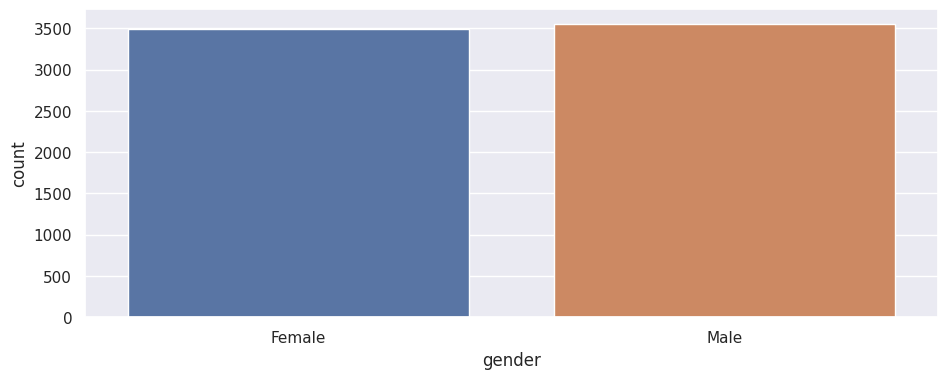

In [32]:
sns.countplot(x = df["gender"])

# Bivariant Analysis


In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

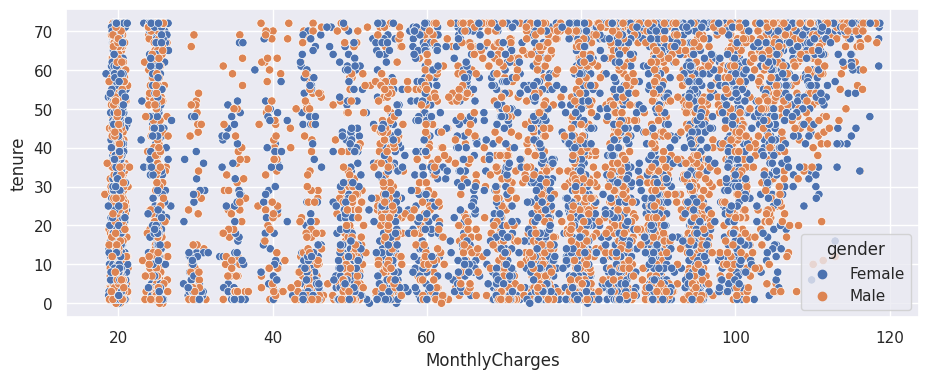

In [34]:
sns.scatterplot(x = df["MonthlyCharges"], y =df["tenure"], hue = df["gender"])

<Axes: xlabel='TotalCharges', ylabel='tenure'>

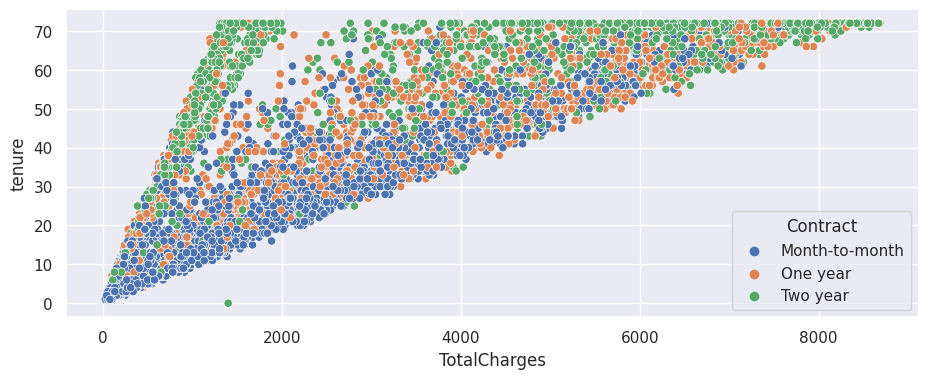

In [92]:
sns.scatterplot(x = df["TotalCharges"], y =df["tenure"], hue = df["Contract"])

<Axes: xlabel='TotalCharges', ylabel='tenure'>

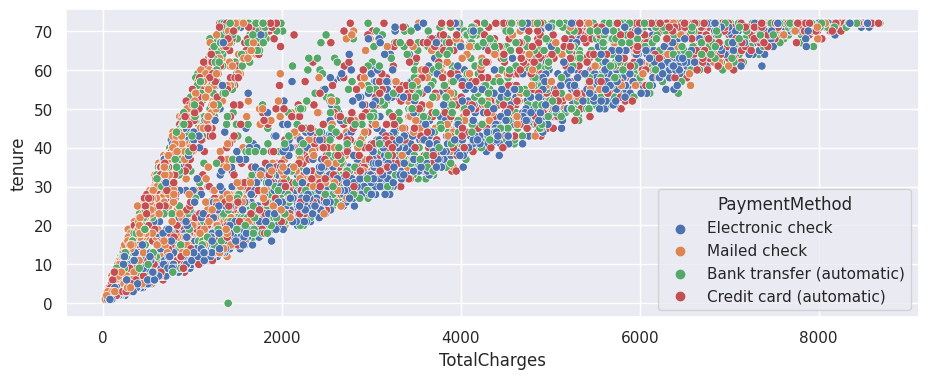

In [93]:
sns.scatterplot(x = df["TotalCharges"], y =df["tenure"], hue = df["PaymentMethod"])

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

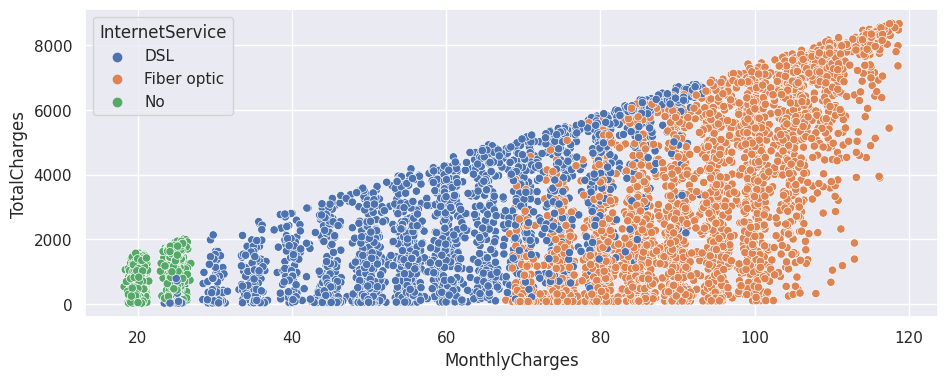

In [95]:
sns.scatterplot(x = df["MonthlyCharges"], y =df["TotalCharges"],hue = df["InternetService"])

<Axes: xlabel='Churn', ylabel='TotalCharges'>

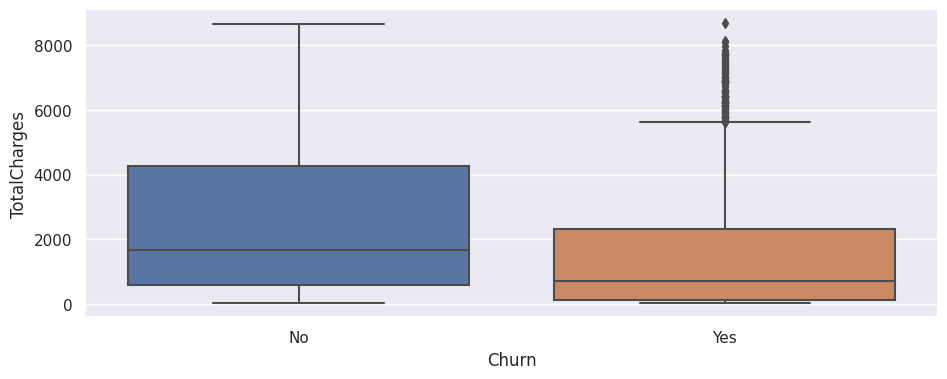

In [37]:
sns.boxplot(y="TotalCharges",x="Churn",data=df)

**when there is a relationship between churn and totalcharges, most of the customers are willing to continue with their services**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

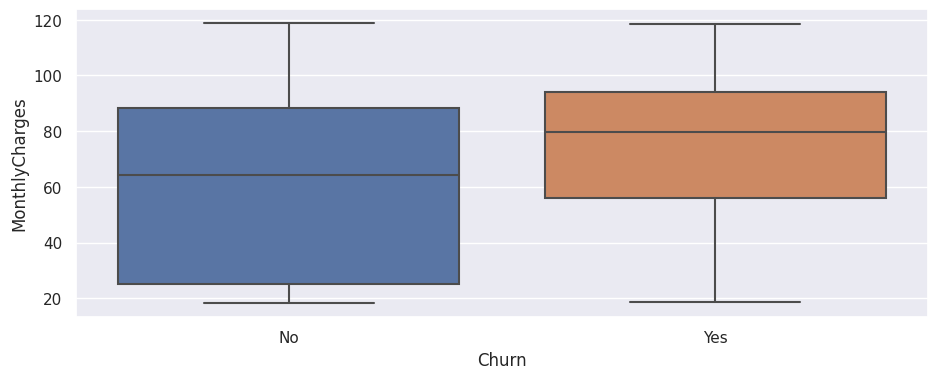

In [38]:
sns.boxplot(y="MonthlyCharges",x="Churn",data=df)

**The monthly charges are high, so some customers are willing to churn because its look like high expansive**

<Axes: xlabel='Churn', ylabel='tenure'>

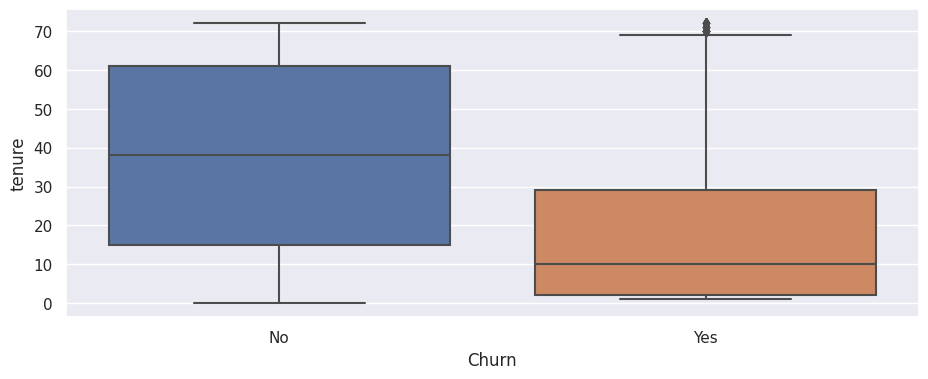

In [39]:
sns.boxplot(y="tenure",x="Churn",data=df)

**We can say that, by considering tenure and churn there is no relationship between them**

In [40]:
# Writing function for Bivariate analysis Vizualization
def visual(x):
    if x.dtype==object :
        pd.crosstab(df["Churn"],x).plot(kind="bar",width=0.8,stacked=True)
        plt.show()


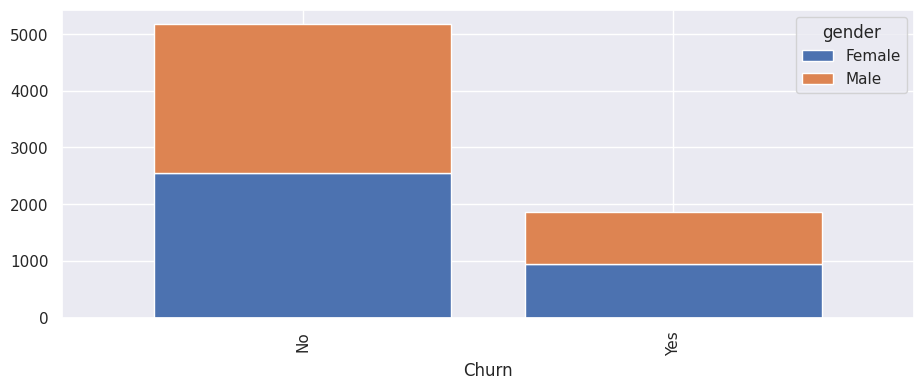

In [41]:
visual(df["gender"])

**Here, only very few customers are ready to churn**

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


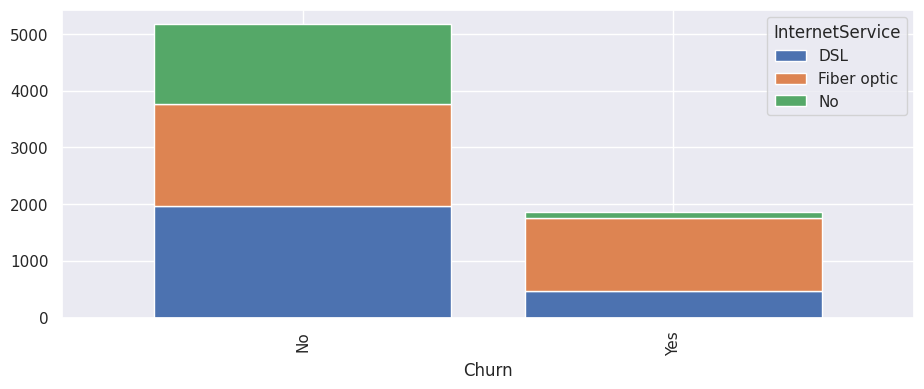

In [43]:
visual(df["InternetService"])

**The customers who are using internetservice like Fiber optic are willing to churn**

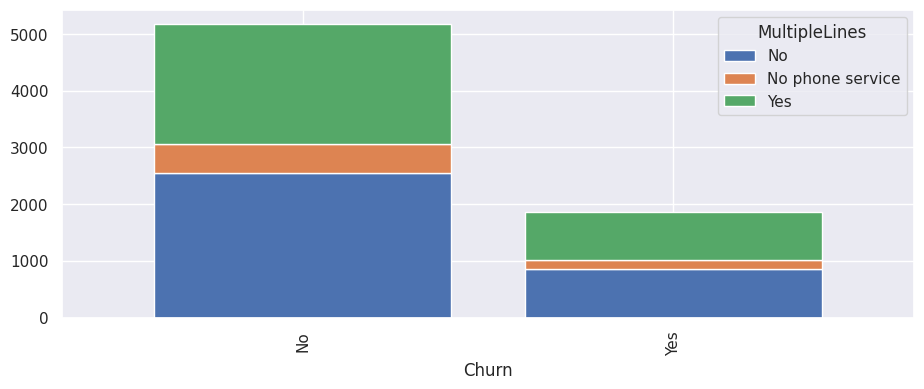

In [44]:
visual(df["MultipleLines"])

## Conclusions

1. The customers who are using internetservice like Fiber optic are willing to churn.
2. the customers who are paying bills by Monthly are influenced to churn.
3. With out providing any offers to the network, the customer's will churn.

## Recommendations

1. According to their data, Provide as much as Offers to the customer's.
2. Improve Internet services.
3. Conduct customer surveys or interviews to gain qualitative insights into the reasons behind churn and gather feedback on service quality and customer experience.

# Machine Learning Model

In [45]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
y = df['Churn']
X = df[['gender', 'tenure', 'PhoneService', 'InternetService', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [49]:
X.head()

,gender,tenure,PhoneService,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,1,No,DSL,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,34,Yes,DSL,No,One year,No,Mailed check,56.95,1889.50
2,Male,2,Yes,DSL,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,45,No,DSL,Yes,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,2,Yes,Fiber optic,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   InternetService   7043 non-null   object 
 4   TechSupport       7043 non-null   object 
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 550.4+ KB


In [51]:
# Identifying the inputs (X) and output (y)

# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [52]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(5282, 10) (5282,)
(1761, 10) (1761,)


# Now segregation of categorical columns and numerical columns

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 6630 to 5640
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   tenure            5282 non-null   int64  
 2   PhoneService      5282 non-null   object 
 3   InternetService   5282 non-null   object 
 4   TechSupport       5282 non-null   object 
 5   Contract          5282 non-null   object 
 6   PaperlessBilling  5282 non-null   object 
 7   PaymentMethod     5282 non-null   object 
 8   MonthlyCharges    5282 non-null   float64
 9   TotalCharges      5282 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 453.9+ KB


In [54]:
X_train.dtypes

gender               object
tenure                int64
PhoneService         object
InternetService      object
TechSupport          object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [55]:
X_train_cat = X_train.select_dtypes(include = "object")
X_train_cat.head()

,gender,PhoneService,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod
6630,Male,Yes,Fiber optic,No,Month-to-month,Yes,Electronic check
7013,Female,Yes,Fiber optic,No,Month-to-month,Yes,Bank transfer (automatic)
2224,Male,Yes,Fiber optic,No,Month-to-month,Yes,Electronic check
6580,Female,Yes,DSL,No,One year,No,Credit card (automatic)
1501,Male,Yes,No,No internet service,Two year,No,Mailed check


In [56]:
X_train_num = X_train.select_dtypes(exclude = "object")
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
6630,16,78.75,1218.25
7013,40,93.40,3756.40
2224,17,76.45,1233.40
6580,49,78.00,3824.20
1501,13,19.95,243.65


# applying a technique on numerical data
1. Standardscaler
2. Normalisation method

In [57]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
6630,-0.669552,0.471732,-0.471643
7013,0.305416,0.957819,0.649818
2224,-0.628928,0.395418,-0.464949
6580,0.671028,0.446847,0.679775
1501,-0.791422,-1.479251,-0.902262


In [58]:
X_train_num.describe()

,tenure,MonthlyCharges,TotalCharges
count,5282.000000,5282.000000,5282.000000
mean,32.481825,64.532630,2285.697709
std,24.618547,30.141497,2263.467586
min,0.000000,18.250000,18.800000
25%,9.000000,35.062500,402.662500
50%,29.000000,70.250000,1397.475000
75%,56.000000,89.700000,3808.150000
max,72.000000,118.650000,8670.100000


In [59]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [  32.48182507   64.53262969 2285.6977092 ]
Std of each column: [  24.61621647   30.13864334 2263.25331323]


# Applying a technique on categorical columns
1. Label encoding for (Ordinal data)
2. OneHotEncoding for (Nominal data)

In [60]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                               columns=encoder.get_feature_names_out(X_train_cat.columns),
                               index = X_train_cat.index)

X_train_cat_ohe.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Male,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [61]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis = 1)

X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6630,-0.669552,0.471732,-0.471643,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7013,0.305416,0.957819,0.649818,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2224,-0.628928,0.395418,-0.464949,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6580,0.671028,0.446847,0.679775,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1501,-0.791422,-1.479251,-0.902262,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Now perform Operation on test data

In [62]:
X_test.head()

,gender,tenure,PhoneService,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4880,Male,50,Yes,No,No internet service,Two year,No,Mailed check,20.55,1067.65
1541,Male,72,Yes,No,No internet service,Two year,No,Bank transfer (automatic),19.85,1434.10
1289,Male,63,Yes,DSL,Yes,One year,No,Bank transfer (automatic),68.80,4111.35
5745,Female,61,Yes,No,No internet service,Two year,Yes,Mailed check,24.20,1445.20
4873,Female,7,Yes,No,No internet service,Month-to-month,No,Mailed check,19.30,144.95


In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 4880 to 3368
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   tenure            1761 non-null   int64  
 2   PhoneService      1761 non-null   object 
 3   InternetService   1761 non-null   object 
 4   TechSupport       1761 non-null   object 
 5   Contract          1761 non-null   object 
 6   PaperlessBilling  1761 non-null   object 
 7   PaymentMethod     1761 non-null   object 
 8   MonthlyCharges    1761 non-null   float64
 9   TotalCharges      1761 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 151.3+ KB


In [64]:
X_test.dtypes

gender               object
tenure                int64
PhoneService         object
InternetService      object
TechSupport          object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [65]:
X_test_cat = X_test.select_dtypes(include = "object")
X_test_cat.head()

,gender,PhoneService,InternetService,TechSupport,Contract,PaperlessBilling,PaymentMethod
4880,Male,Yes,No,No internet service,Two year,No,Mailed check
1541,Male,Yes,No,No internet service,Two year,No,Bank transfer (automatic)
1289,Male,Yes,DSL,Yes,One year,No,Bank transfer (automatic)
5745,Female,Yes,No,No internet service,Two year,Yes,Mailed check
4873,Female,Yes,No,No internet service,Month-to-month,No,Mailed check


In [66]:
X_test_num = X_test.select_dtypes(exclude = "object")
X_test_num.head()

,tenure,MonthlyCharges,TotalCharges
4880,50,20.55,1067.65
1541,72,19.85,1434.10
1289,63,68.80,4111.35
5745,61,24.20,1445.20
4873,7,19.30,144.95


# Applying a technique on categorical columns
1. Label encoding for (Ordinal data)
2. OneHotEncoding for (Nominal data)

In [67]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                    columns = X_test_num.columns,
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,tenure,MonthlyCharges,TotalCharges
4880,0.711652,-1.459343,-0.538184
1541,1.605372,-1.482569,-0.376271
1289,1.239759,0.141591,0.806650
5745,1.158512,-1.338236,-0.371367
4873,-1.035164,-1.500818,-0.945872


In [68]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                               columns=encoder.get_feature_names_out(X_test_cat.columns),
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
X_test_transformed = pd.concat([X_test_num_rescaled ,X_test_cat_ohe], axis = 1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,PhoneService_Yes,InternetService_Fiber optic,InternetService_No,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4880,0.711652,-1.459343,-0.538184,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1541,1.605372,-1.482569,-0.376271,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1289,1.239759,0.141591,0.806650,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5745,1.158512,-1.338236,-0.371367,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4873,-1.035164,-1.500818,-0.945872,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Applying Regression Algorithms

In [70]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)


LogisticRegression()

In [71]:
# data preprocessing on X_test

y_test_pred = classifier.predict(X_test_transformed)

In [72]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
4880,No,No
1541,No,No
1289,No,No
5745,No,No
4873,No,No


# Evaluation of matrices

In [73]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)


0.7819420783645656

<Axes: xlabel='Churn', ylabel='Count'>

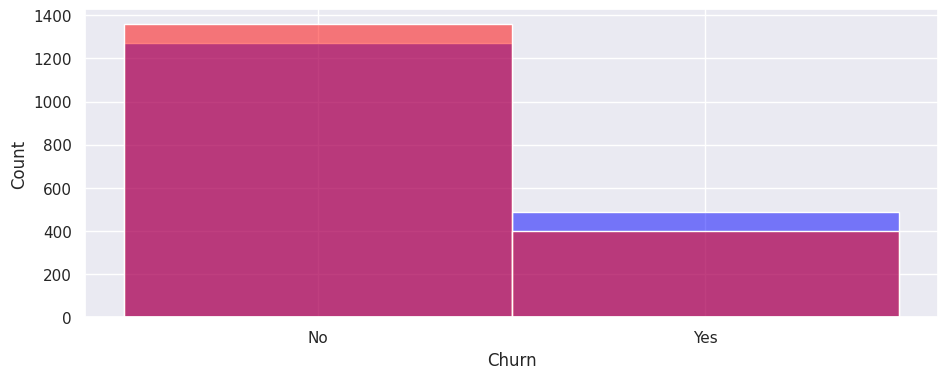

In [74]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [76]:
# prediction

y_test_pred = classifier.predict(X_test_transformed)

In [77]:
# evaluation

metrics.accuracy_score(y_test,y_test_pred)

0.7745599091425327

<Axes: xlabel='Churn', ylabel='Count'>

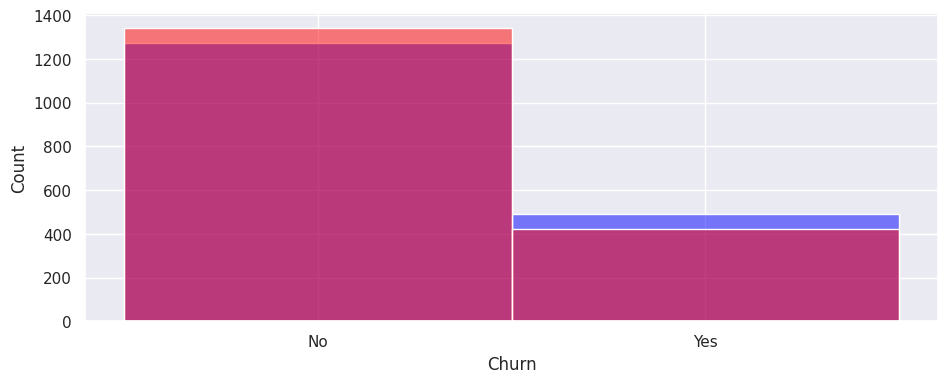

In [78]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [79]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [80]:
# prediction

y_test_pred = classifier.predict(X_test_transformed)

In [81]:
# evaluation of metrices

from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.717206132879046

<Axes: xlabel='Churn', ylabel='Count'>

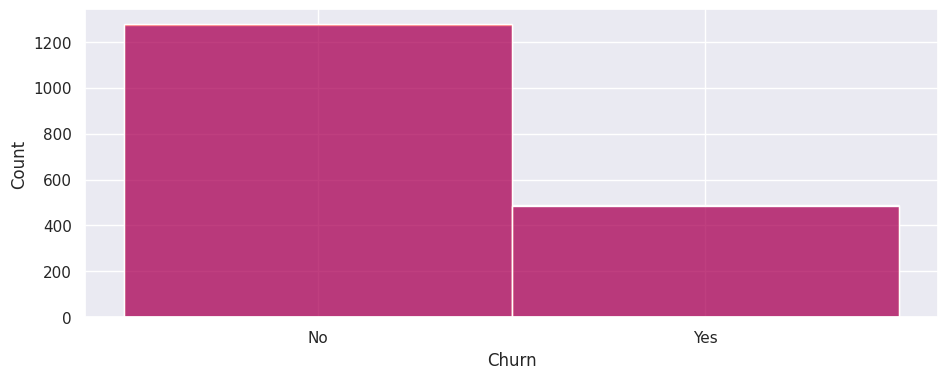

In [82]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(X_train_transformed, y_train)


RandomForestClassifier()

In [84]:
# prediction

y_test_pred = classifier.predict(X_test_transformed)

In [85]:
# evaluation

metrics.accuracy_score(y_test, y_test_pred)

0.7705848949460534

<Axes: xlabel='Churn', ylabel='Count'>

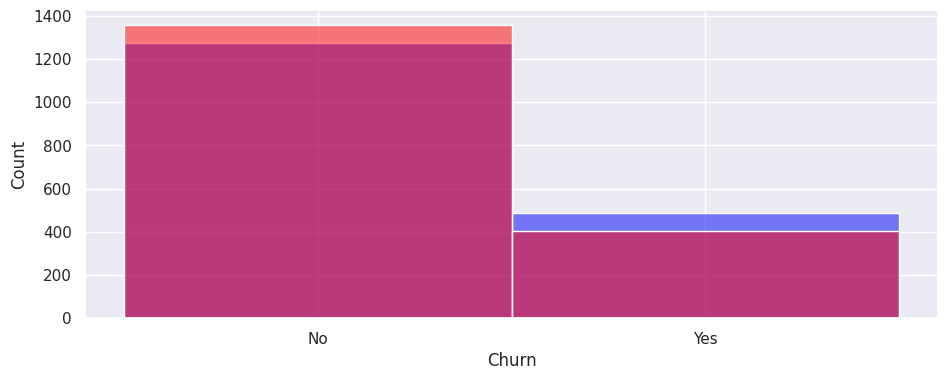

In [86]:
import seaborn as sns
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [87]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.78137421919364

<Axes: xlabel='Churn', ylabel='Count'>

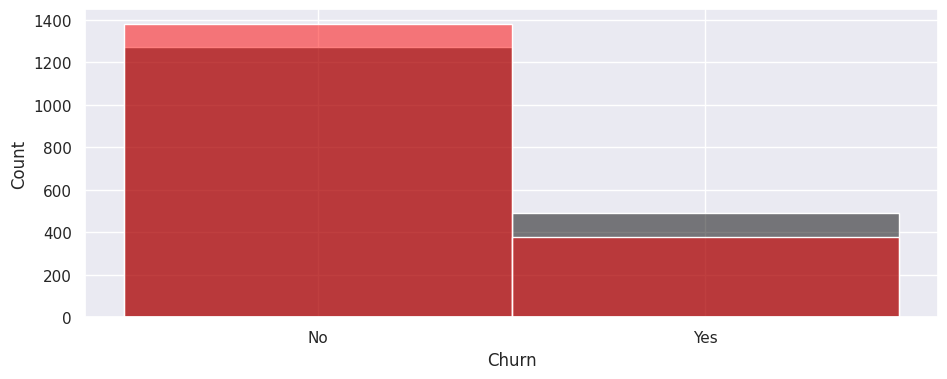

In [91]:
sns.histplot(y_test, color='black', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

# Conclusion

**From the above Algorithms Logistic Regression, Random Forest Classifier and Spport Vector Classification accuracy is almost same then compare to KNN Classification and Decision Tree Classifier Algorithms accuracy is almost same.**